# **Predicting Term Deposits Subscription: A Classification & Segmentation Approach for Bank Telemarketing Campaigns**

# Problem Statement:

A bank conducted a telemarketing campaign for one of its financial products called ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts with the bank.

What is the term Deposit?

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.


# Business Objective:

**This project implements the machine learning binary classification to predict if the customer will take/** **subscribe a bank term deposit (variable y) by analyzing various customers dimensions. Build a model for Data-Driven Approach to Predict the Success of Bank Telemarketing**


# Import Libraries

In [67]:
import pandas as pd 
import numpy as np  
import sidetable
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
from pathlib import Path
from glob import glob
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from itertools import combinations

# Display Settings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion & Basic Understanding

In [3]:
path = Path.cwd().parent
path_data = path/'data'/'raw'
files = []
for file in path_data.glob('*'):
    files.append(file)

files

[WindowsPath('e:/Bank-Telemarketing/data/raw/.gitkeep'),
 WindowsPath('e:/Bank-Telemarketing/data/raw/bank-additional-full.csv'),
 WindowsPath('e:/Bank-Telemarketing/data/raw/bank-additional-names.txt'),
 WindowsPath('e:/Bank-Telemarketing/data/raw/bank-full.csv'),
 WindowsPath('e:/Bank-Telemarketing/data/raw/info.txt')]

In [4]:
f = open(path_data/'bank-additional-names.txt','rt')
for line in f.readlines():
    print(line.strip())

Citation Request:
This dataset is publicly available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

3. Past Usage:

The full dataset (bank-additional-full.csv) was described and analyzed in:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

4. Relevant Information:

This dataset is based on "Bank Marketing" UC

In [5]:
data = pd.read_csv(path/'data'/'raw'/'bank-additional-full.csv', sep=';')
data.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [6]:
data.tail(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,no


In [7]:
data.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7411,37,technician,single,university.degree,no,yes,no,telephone,may,fri,295,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [8]:
data.shape
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 41188
Number of columns: 21


In [9]:
# Remove whitespace from column names
data.columns = data.columns.str.strip()
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The data is collected by Banco de Portugal via direct phone call marketing campaigns but duration of call is not included, where 20 columns are recorded for 41188 term deposit market campaign.

**Bank Client Data Description:**

- **age**: Age of the client (numeric)
- **job**: Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- **marital**: Marital status (categorical: 'divorced', 'married', 'single', 'unknown')
- **education**: Level of education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- **default**: Whether the client has credit in default (binary: 'no', 'yes', 'unknown')
- **housing**: Whether the client has a housing loan (binary: 'no', 'yes', 'unknown')
- **loan**: Whether the client has a personal loan (binary: 'no', 'yes', 'unknown')

**Last Contact Data Description:**

- **contact**: Type of communication used to contact the client (categorical: 'cellular', 'telephone')
- **month**: Last contact month of the year (categorical: 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')
- **day_of_week**: Last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- **duration**: Duration of the last contact in seconds (numeric)
Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

**Campaign Data Description:**

- **campaign**: Number of contacts performed during this campaign for this client (numeric, includes last contact)
- **pdays**: Number of days since the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: Number of contacts performed before this campaign for this client (numeric) 
- **poutcome**: Outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**Social and Economic Context Data Description:**

- **emp.var.rate**: Employment variation rate - quarterly indicator (numeric)
- **cons.price.idx**: Consumer price index - monthly indicator (numeric)
- **cons.conf.idx**: Consumer confidence index - monthly indicator(numeric)
- **euribor3m**: Euribor 3-month rate - daily indicator(numeric)
- **nr.employed**: Number of employees - quarterly indicator(numeric)

**Target Variable:**
- **y**: Whether the client subscribed to a term deposit (binary: 'no', 'yes')



*****Dataset Summary:*****

**This dataset represents the direct marketing campaign(phone calls) of a Portuguese banking institution, where each record represents a client and the outcome of a marketing campaign to convince the client to subscribe a term deposit. The dataset contains both categorical and numerical features describing each client's demographics, behaviroal, social and economic context, with a binary target variable indicating whether the client subscribed to a term deposit. The data spans from May 2008 to November 2010**

**Missing Attribute Values**: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


# Formatting and Consistency Checks

In [11]:
pd.DataFrame({
    'dtype':data.dtypes,
    'nunique': data.nunique(),
    'unique': [data[col].unique() for col in data.columns]},
    index=data.columns)

,dtype,nunique,unique
age,int64,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,object,12,"[housemaid, services, admin., blue-collar, tec..."
marital,object,4,"[married, single, divorced, unknown]"
education,object,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,object,3,"[no, unknown, yes]"
housing,object,3,"[no, yes, unknown]"
loan,object,3,"[no, yes, unknown]"
contact,object,2,"[telephone, cellular]"
month,object,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,object,5,"[mon, tue, wed, thu, fri]"


In [12]:
def highlight_zero_negative(val):
    if val < 0:
        return 'background-color: red; color: white;'  # Negative values styled in red
    elif val == 0:
        return 'background-color: yellow; color: black;'  # Zero values styled in yellow
    else:
        return ''  # No styling for positive values

In [13]:
def highlight_repeats(series):
    is_repeat = series.duplicated(keep=False)  # Identify repeated values
    return ['background-color: green; color: white' if repeat else '' for repeat in is_repeat]


In [14]:
# Formatting and data descripition for numerical columns 
df_descb = data.describe(include='number')
display(df_descb.style.applymap(highlight_zero_negative))
df_descb.style.apply(highlight_repeats)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**NOTEs:**

- **Duration**: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- **pdays** : 999 means client was not previously contacted


In [15]:
data[data['duration'].isin([0])]['y']

6251     no
23031    no
28063    no
33015    no
Name: y, dtype: object

In [16]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [17]:
# Categorical columns Consistency Check

def calculate_category_cols_info(df:pd.DataFrame):
    #Store data in dictionary
    value_dict = {}
    pct_dict = {}

    # Get categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # Iterate through each categorical column
    for col in cat_cols:
        count = df[col].value_counts()
        pct = df[col].value_counts(normalize=True) * 100
        value_dict[col] = count.to_dict()
        pct_dict[col] = pct.to_dict()

    # Convert dictionary of dictionaries to DataFrames
    count_df = pd.DataFrame.from_dict(value_dict, orient='index').stack().reset_index()
    count_df.columns = ['Features', 'Category', 'Count']
    pct_df = pd.DataFrame.from_dict(pct_dict, orient='index').stack().reset_index()
    pct_df.columns = ['Features', 'Category', 'Percentage']

    # Merge the two DataFrames on Features and Category
    result_df = pd.merge(count_df, pct_df, on=['Features', 'Category'])
    
    # Set MultiIndex for better readability
    result_df.set_index(['Features', 'Category'], inplace=True)

    return result_df

In [18]:
# Define a function to highlight specific category
def highlight_category(val):
    return np.where(val=='unknown','background-color: orange; color:white;',"")  # Highlight 'unknown' in orange


In [19]:
cat_df = calculate_category_cols_info(data)
cat_df.style.apply_index(highlight_category)

In [20]:
# Data Duplicates Check
data.duplicated().sum()

np.int64(12)

In [21]:
data = data.drop_duplicates()
data.shape

(41176, 21)

# Univariate Analysis of Target Variable

In [22]:
# Change name of target column(y)
data.rename(columns={'y': 'term_deposit'},inplace=True)

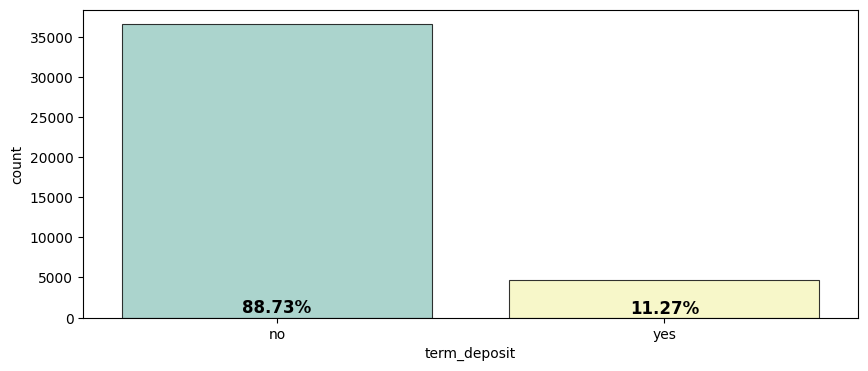

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(x=data['term_deposit'],palette='Set3',alpha=0.8, edgecolor='black', linewidth=0.8)
for i, v in enumerate(round(data['term_deposit'].value_counts(normalize=True)*100,2)):
    plt.text(i,v+50,f'{v:.2f}%',ha='center', va= 'bottom',fontsize=12,fontweight='bold' ,color='black')
plt.show()

**Data is highly imbalanced, with a significant majority of customers not subscribing to the term deposit. This imbalance will need to be addressed in the modeling phase, possibly through techniques such as resampling or using algorithms that can handle class imbalance effectively.**

# Exploratory Data Analysis (EDA)

## Customer Segmenation Analysis

### Demographic Segmentation

- Demographic factors are statistical characteristics of a populations that helps in analyzing and understanding social, economic and cultural trends. Common demographic factors include **age, gender, income, education level, marital status, occupation, and geographic location**. These factors are often used in market research, public health studies, and social science research to segment populations and identify patterns or trends.

By the above definition of demographic factors, the following featurs can be considered as demographic factors in the datset:
- **age**: indicator of the customer's age group, ehich can influence their financial behaviour and lifestyle choices.'
- **job**: indicate the customer's occupation, which can affect their income and financial decisions.
- **marital**: indicates the customer's marital status, which can influence financial priorities and consumption patterns.
- **education**: indicates the customer's level of education, which can impact their financial literacy and decision-making abilities.

In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'term_deposit'],
      dtype='object')

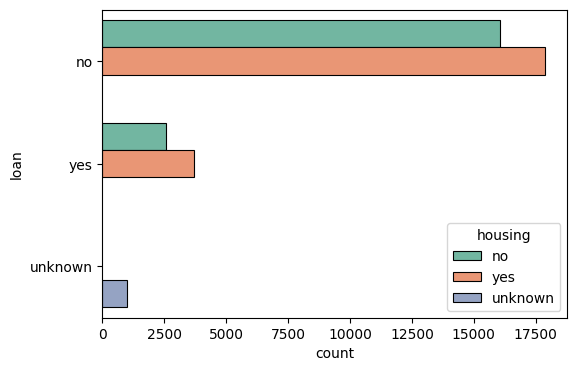

In [25]:
# Number of campaign customer by personal loans and housing loans
plt.figure(figsize=(6,4))
sns.countplot(data=data, y='loan', hue='housing', palette='Set2', edgecolor='black', linewidth=0.8)
plt.show()

In [26]:
# plots for numeric columns and target column
def plot_numeric_columns(df:pd.DataFrame, column:str, target:str='term_deposit', kde:bool = True,edgecolor:str = 'black',multiple:str ='stack') ->None:
    ''' 
    Plots histogram and normalized histogram of specified numeric columns with a target column in hue.

    Parameters:


    Returns:
    None: Displays the histogram and normalized histogram plots for numeric columns.
    '''
    fig, ax = plt.subplots(ncols=2, figsize=(16,8),sharey=True)

    # histogram plot for each type of term_deposit customer
    sns.histplot(data=df, y=column, hue=target ,kde=kde, edgecolor=edgecolor,linewidth=0.8, legend=False, alpha =0.6,multiple=multiple ,ax=ax[0])

    # Normalized histogram plot for each type of term_deposit customer
    sns.histplot(data=df, y=column, hue=target,kde=kde ,stat='percent', edgecolor=edgecolor,linewidth=0.8, multiple=multiple ,ax=ax[1])

    # set titles and labels
    ax[0].set_ylabel(column.capitalize(), fontsize=12, fontweight='bold')
    ax[0].set_xlabel('Term Deposit Count', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('Term Deposit Percentage', fontsize=12, fontweight='bold')

    # Hide all spines for both subplots
    sns.despine(left=True,bottom=True)
    # Display settings
    plt.suptitle(f'Distribution of Counts & Percentages of Normalized Term Deposit for {column.capitalize()}', fontsize=14, fontweight='bold')
    plt.subplots_adjust(top=0.96)
    plt.tight_layout()
    plt.show()


In [27]:
# plots for categorical columns and target column
def plot_categorical_columns(df:pd.DataFrame, column: str, target:str='term_deposit'):
    """
    Plot counts and percentages of a categorical column with respect to a target column.

    Parameters:

    Returns:
    None: Displays the bar plot of counts and percentages of the categorical column with respect to the target column.
    """
    # count DataFrame for the specified column and target
    count_df = pd.crosstab(df[column], df[target]).stack().reset_index().rename(columns={0:'count'})
                                                                                
    # percentage DataFrame for the specified column and target
    pct_df = (pd.crosstab(df[column], df[target], normalize='index').round(4)*100).stack().reset_index().rename(columns={0:'percentage'})

    # Display the counts DataFrame
    display(count_df.head(10))

    # Create subplots for count and percentage
    fig, ax = plt.subplots(ncols=2, figsize=(16,6), sharey=True)

    #plot using seaborn barplot for count and percentage
    sns.barplot(data=count_df, x='count', y=column, hue=target, ax=ax[0], palette='Set2', edgecolor='black', linewidth=0.8)
    sns.barplot(data=pct_df, x='percentage', y=column, hue=target, ax=ax[1], palette='Set2', edgecolor='black', linewidth=0.8,legend=False)

    # Set titles and labels
    ax[0].set_ylabel(column.capitalize(), fontsize=12, fontweight='bold')
    ax[0].set_xlabel('Count', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('Percentage', fontsize=12, fontweight='bold')
    

    # Hide all spines for both subplots
    sns.despine(left=True, bottom=True)
    
    # Display settings
    plt.suptitle(f'Counts & Percentages of Term Deposit for each category in {column.capitalize()}', fontsize=14, fontweight='bold')
    plt.subplots_adjust(top=0.96)   
    plt.tight_layout()

    #add legend to the first subplot
    ax[0].legend(labelcolor='linecolor', loc='lower right', title=target.capitalize(),edgecolor='black', fontsize=10, title_fontsize='12', frameon=True, framealpha=0.8)
    plt.show()

                                                                                                                                        

**Age**

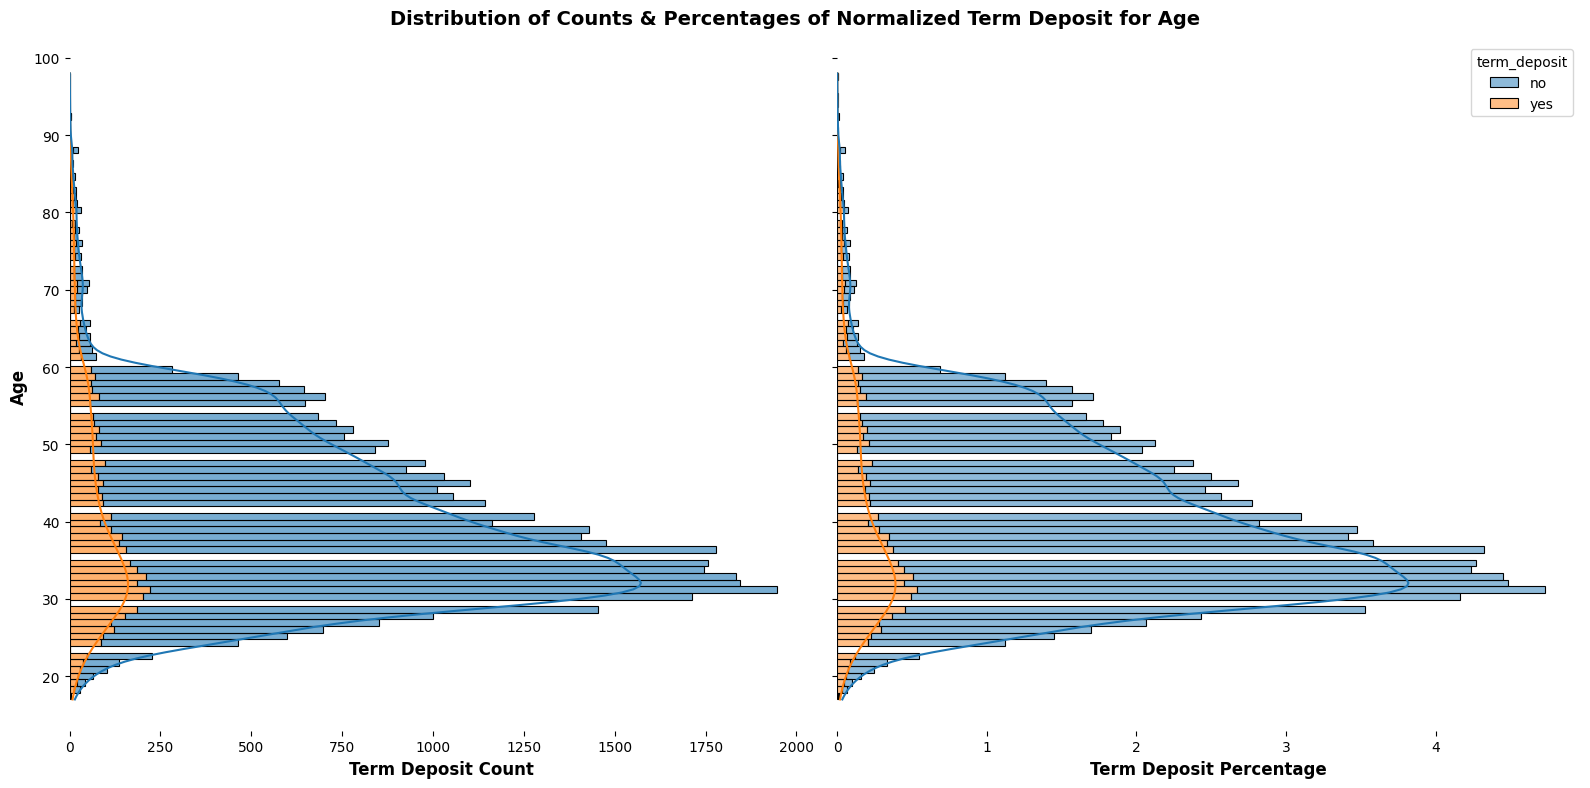

In [28]:
plot_numeric_columns(data, 'age')

**job**

,job,term_deposit,count
0,admin.,no,9068
1,admin.,yes,1351
2,blue-collar,no,8615
3,blue-collar,yes,638
4,entrepreneur,no,1332
5,entrepreneur,yes,124
6,housemaid,no,954
7,housemaid,yes,106
8,management,no,2596
9,management,yes,328


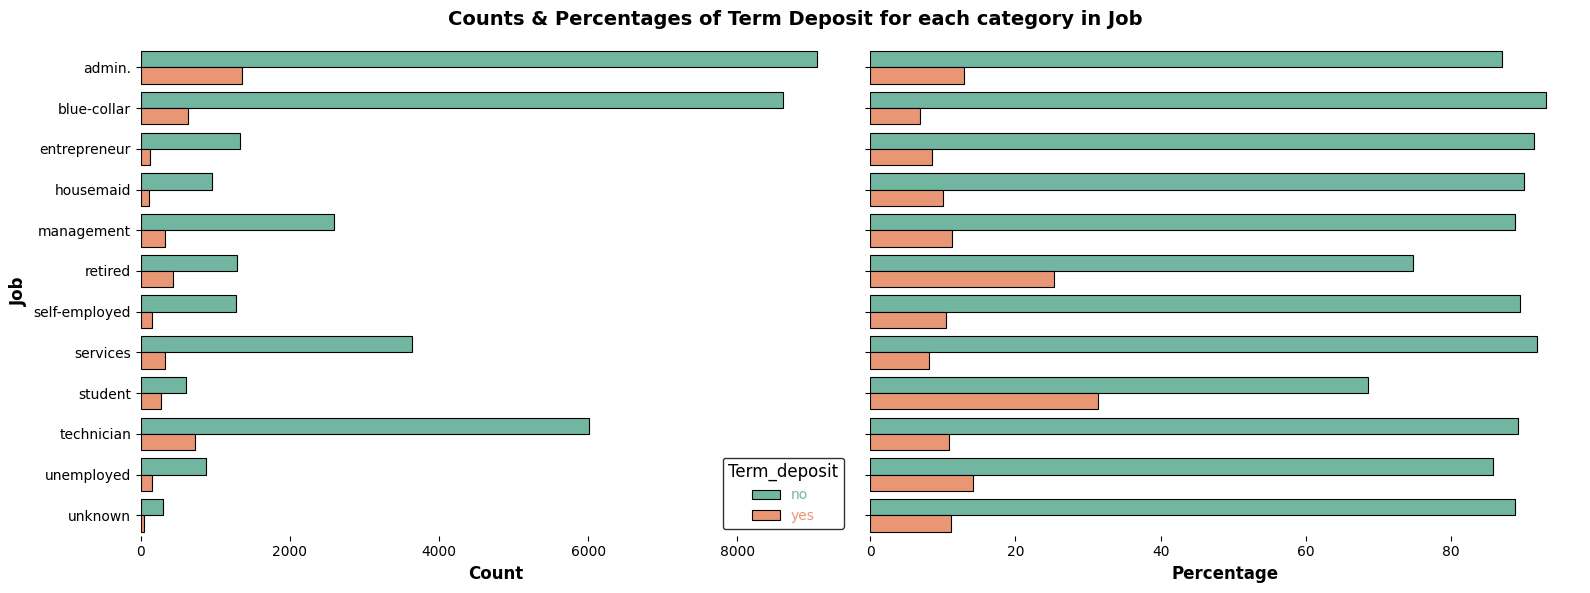

In [29]:
plot_categorical_columns(data, column='job')

**Marital**

,marital,term_deposit,count
0,divorced,no,4135
1,divorced,yes,476
2,married,no,22390
3,married,yes,2531
4,single,no,9944
5,single,yes,1620
6,unknown,no,68
7,unknown,yes,12


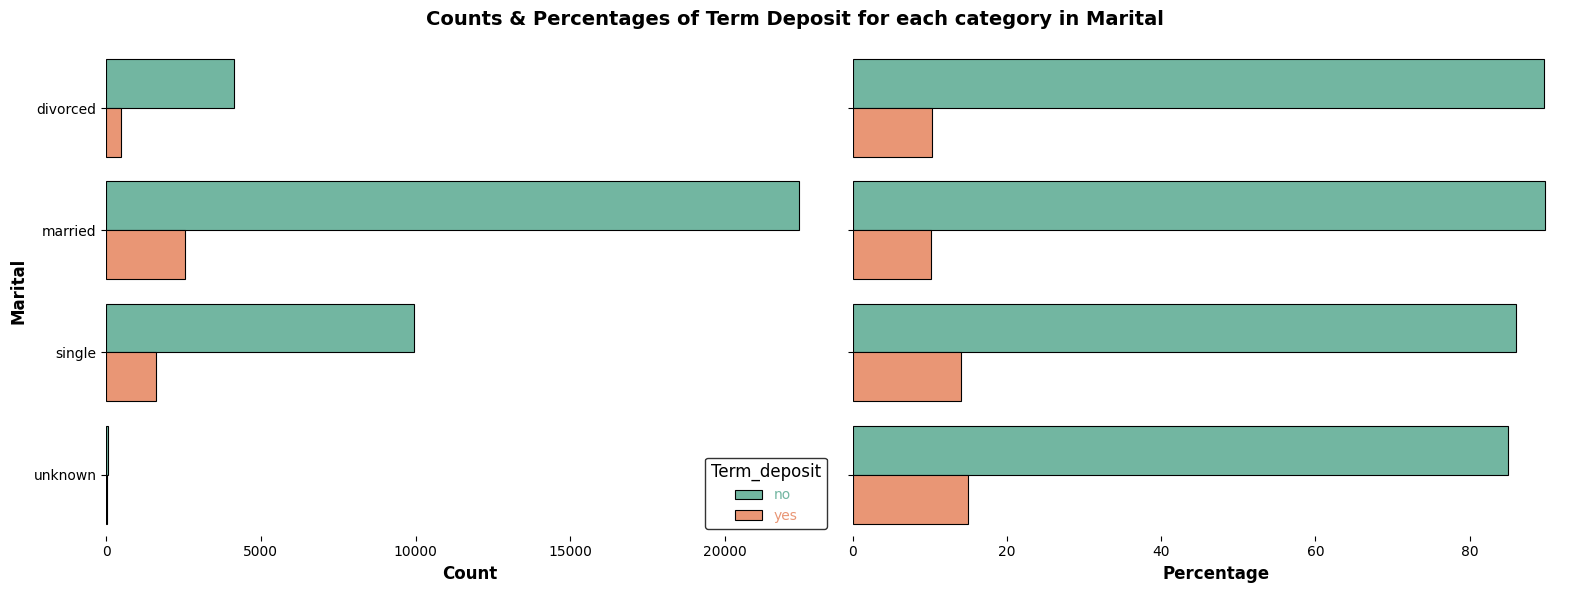

In [30]:
plot_categorical_columns(data, column='marital')

**Education**

,education,term_deposit,count
0,basic.4y,no,3748
1,basic.4y,yes,428
2,basic.6y,no,2103
3,basic.6y,yes,188
4,basic.9y,no,5572
5,basic.9y,yes,473
6,high.school,no,8481
7,high.school,yes,1031
8,illiterate,no,14
9,illiterate,yes,4


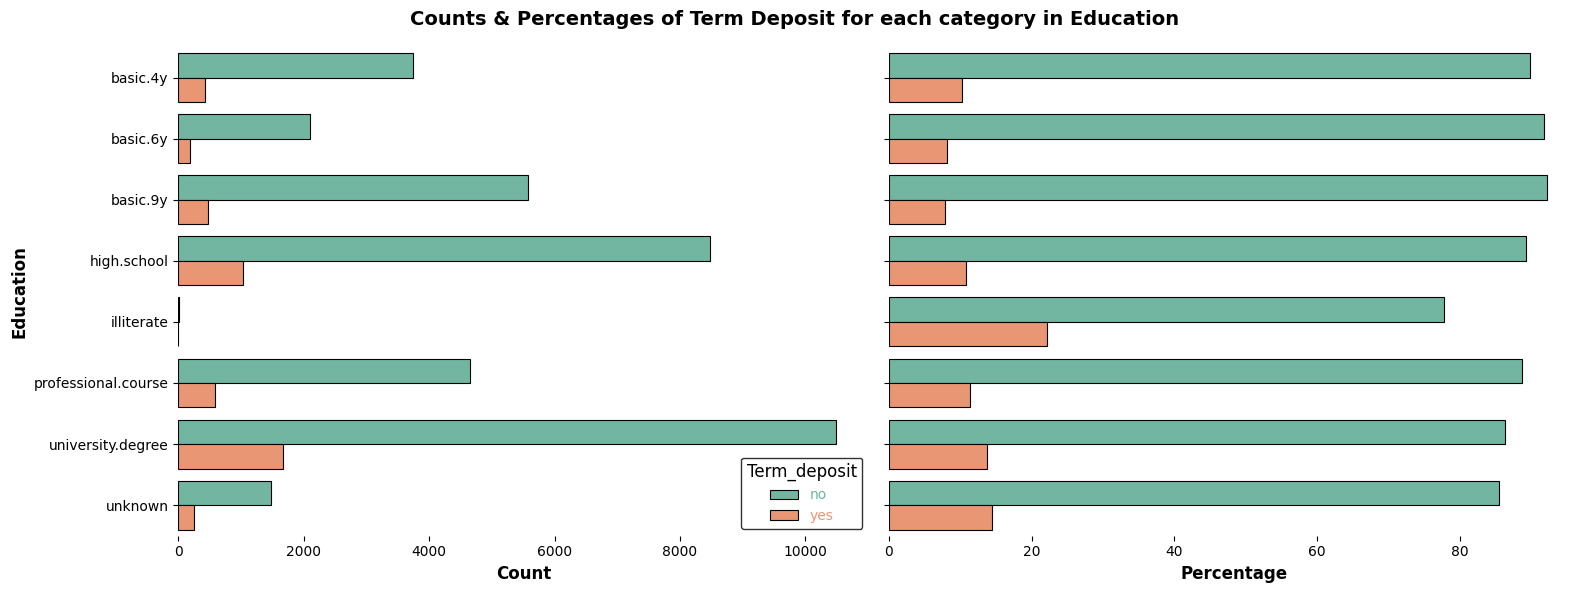

In [31]:
plot_categorical_columns(data, column='education')

### Financial/Behavioral Segmentation

- Those factors which describe how the customer behaves in terms of financial decisions, response to campaigns and interaction with financial products. By this definition following features can be considered as financial factors in the datset:

- **default**: indicates financial relability and risk behaviour.
- **housing**: indicates a whether the customer has long-term financial commitments.
- **loan**: presence of a personal loan indicates borrowing behaviour.
- **campaign**: shows engagement with marketing efforts indicating responsivness.
- **pdays**:  indicates the number of days since the last contact, reflecting the recency of customer interaction.
- **previous**: number of previous contacts, indicating the customer's history with the bank.
- **poutcome**: outcome of the previous marketing campaign, indicating the effectiveness of past interactions.

default,no,unknown,yes
housing,,,
no,14608,4005,2
unknown,763,227,0
yes,17206,4364,1


<Axes: xlabel='count', ylabel='housing'>

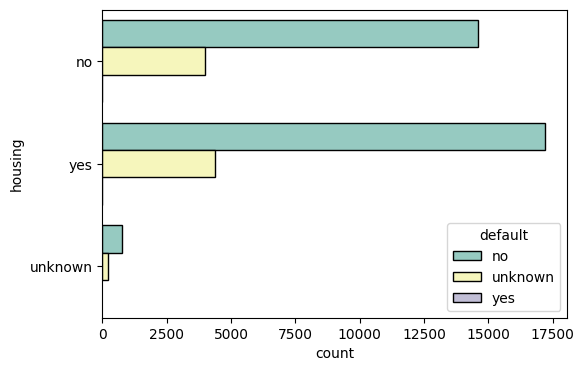

In [32]:
# Number of term_deposit customer by personal loans and housing loans
display(pd.crosstab(data['housing'], data['default']))
plt.figure(figsize=(6,4))
sns.countplot(data=data,y='housing',hue='default',palette='Set3', edgecolor='black')

**Poutcome**

,poutcome,term_deposit,count
0,failure,no,3647
1,failure,yes,605
2,nonexistent,no,32411
3,nonexistent,yes,3140
4,success,no,479
5,success,yes,894


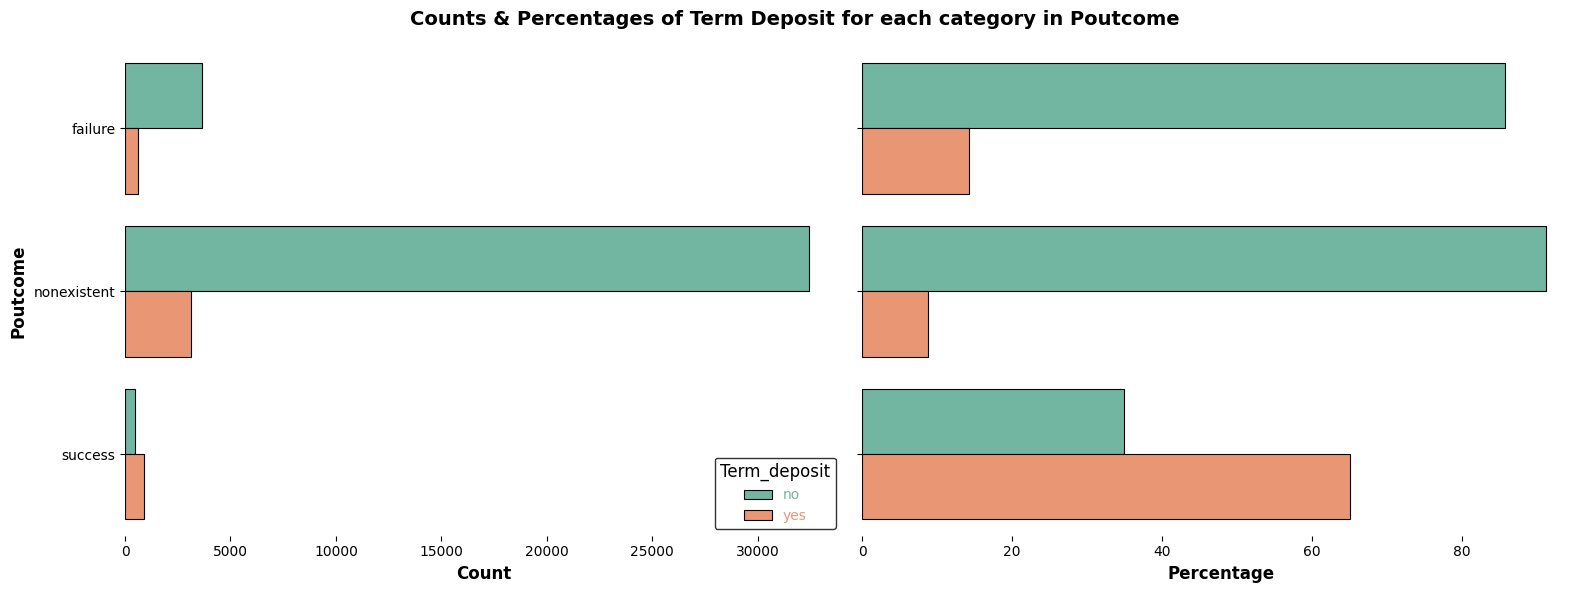

In [33]:
plot_categorical_columns(data,column='poutcome')

**Default**

,default,term_deposit,count
0,no,no,28381
1,no,yes,4196
2,unknown,no,8153
3,unknown,yes,443
4,yes,no,3
5,yes,yes,0


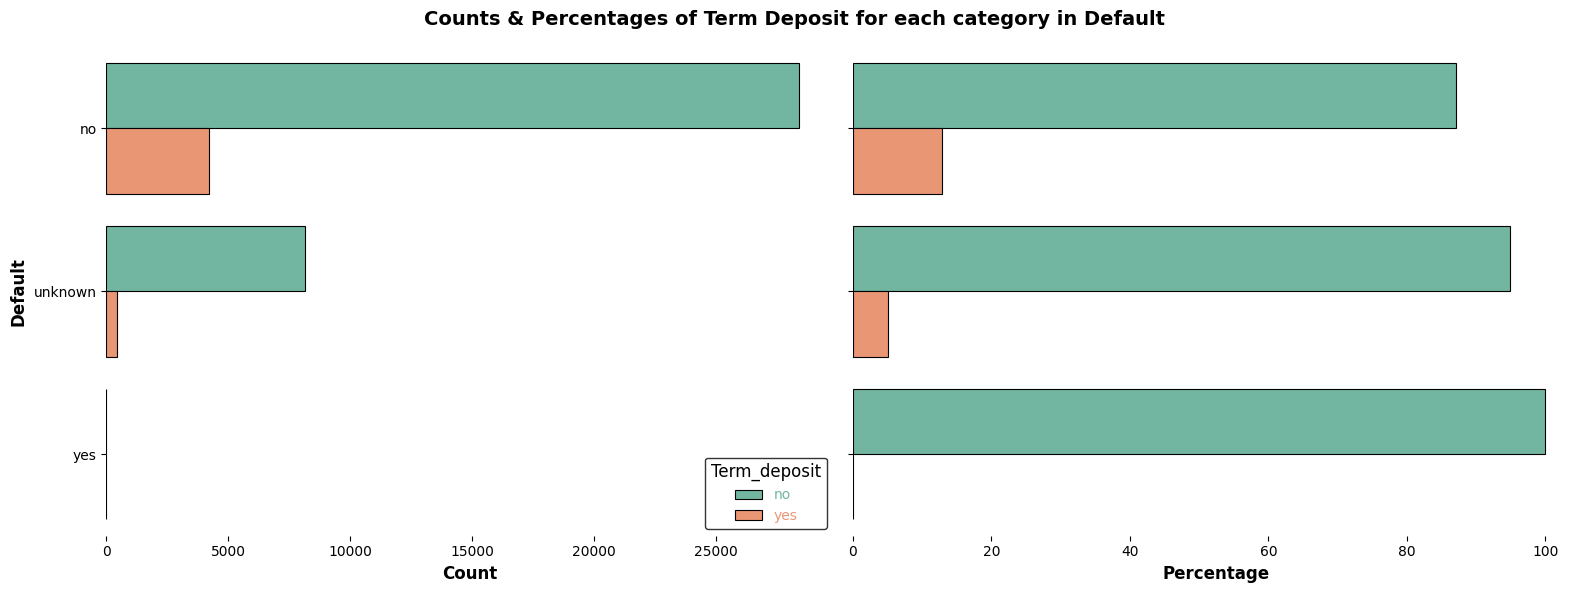

In [34]:
plot_categorical_columns(data,column='default')

**Housing**

,housing,term_deposit,count
0,no,no,16590
1,no,yes,2025
2,unknown,no,883
3,unknown,yes,107
4,yes,no,19064
5,yes,yes,2507


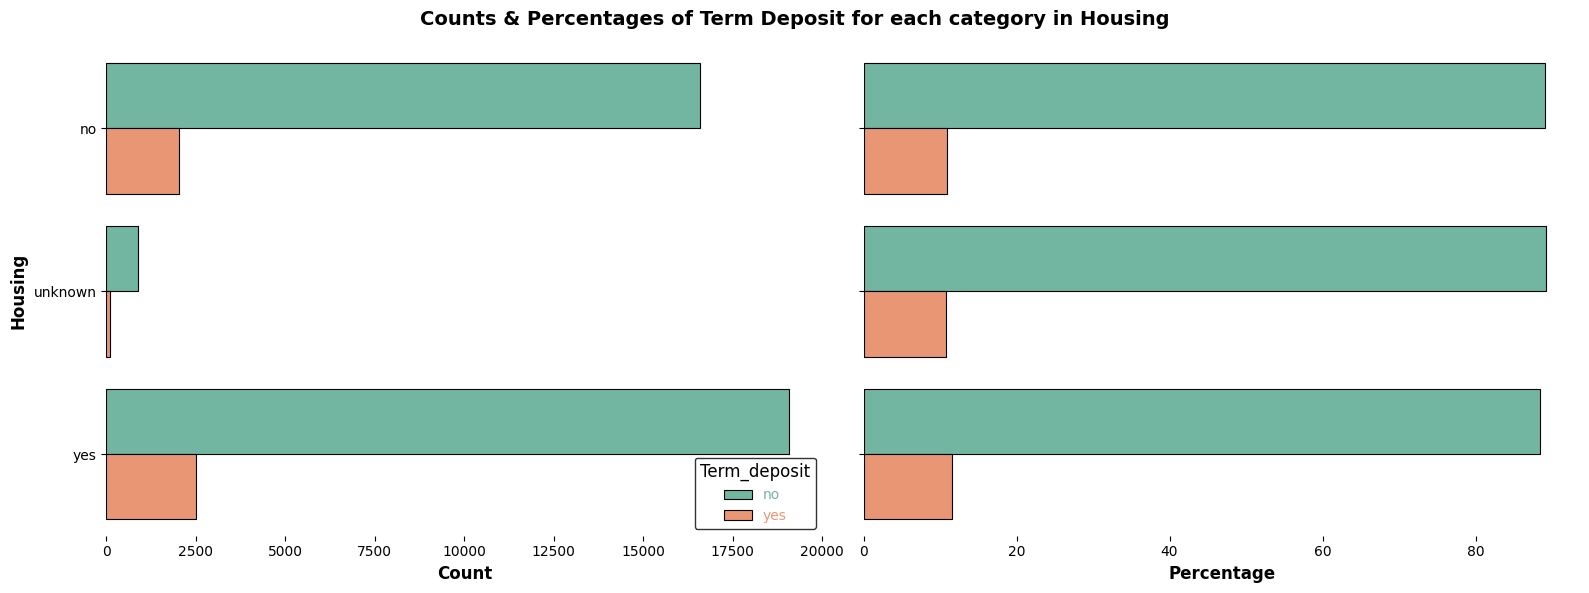

In [35]:
plot_categorical_columns(data, column='housing')

**Loan**

,loan,term_deposit,count
0,no,no,30089
1,no,yes,3849
2,unknown,no,883
3,unknown,yes,107
4,yes,no,5565
5,yes,yes,683


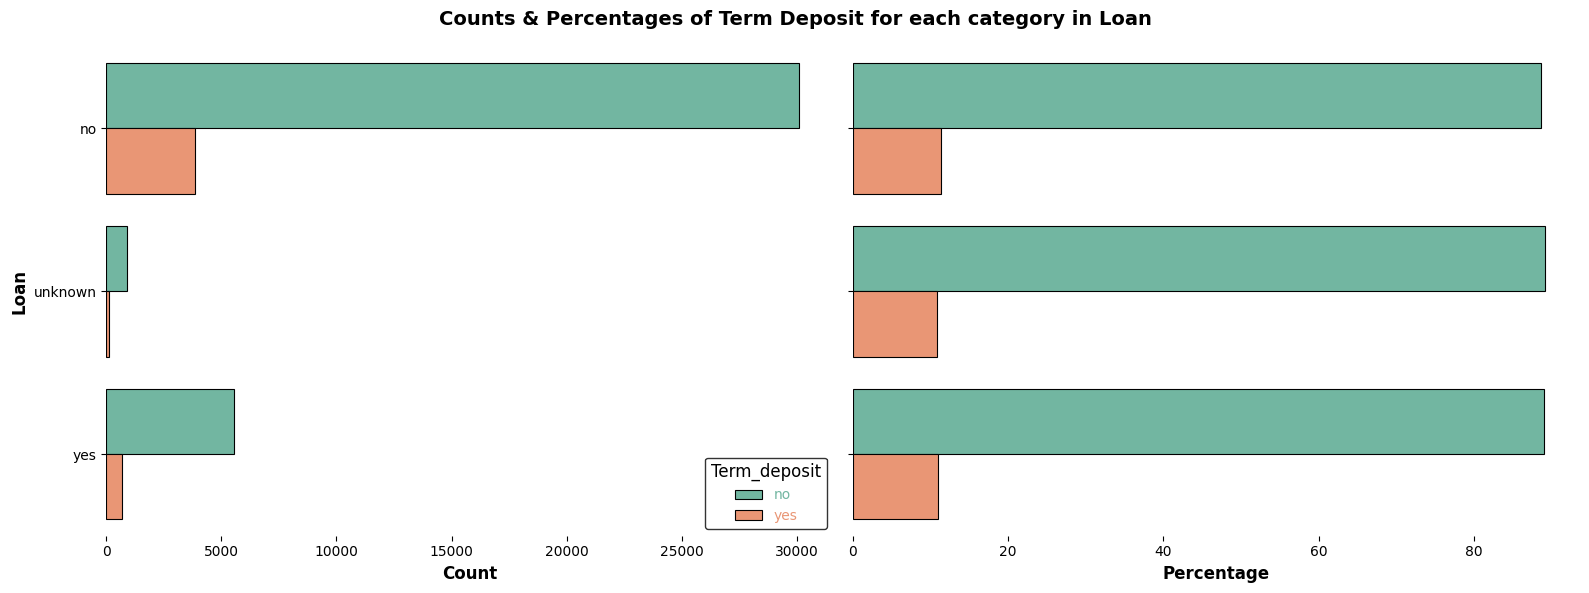

In [36]:
plot_categorical_columns(data, column='loan')

**Campaign**

**How the percentage of subscribers of term deposits varies with the campaign attempts**

**conclusion: campaign counts greater than 10 campaigns are not effective in converting customers to term deposits , in other words, attempts greater than 10, are small from below analysis**


term_deposit,no,yes,pct_success
campaign,,,
1,15335,2299,13.04
2,9357,1211,11.46
3,4766,574,10.75
4,2401,249,9.40
5,1479,120,7.50
6,904,75,7.66
7,591,38,6.04
8,383,17,4.25
9,266,17,6.01


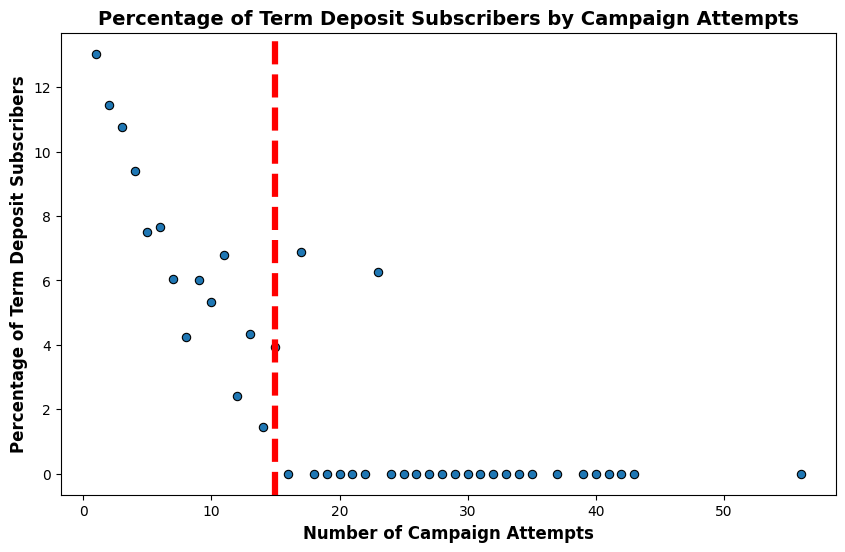

In [37]:
campaign_counts = pd.crosstab(data['campaign'], data['term_deposit'])
campaign_counts['pct_success'] = ((campaign_counts['yes']/(campaign_counts['no'] + campaign_counts['yes'])))*100
display(campaign_counts.head(10))

# plot scatter plot for campaign attempts and percentage of term deposit subscribers
plt.figure(figsize=(10,6))
sns.scatterplot(data=campaign_counts, x='campaign', y='pct_success', palette='Set2', edgecolor='black', linewidth=0.8)
plt.axvline(x=15, color='red', linestyle='--', linewidth=4.5)
plt.xlabel('Number of Campaign Attempts', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of Term Deposit Subscribers', fontsize=12, fontweight='bold')
plt.title('Percentage of Term Deposit Subscribers by Campaign Attempts', fontsize=14, fontweight='bold')
plt.show()

**Pdays**

**Conclusion: In this campaign mostly new customers were contacted. Customers who were not previously contacted are least like to subscribe for term deposit from the below analysis.**


In [38]:
pday_df = pd.crosstab(data['pdays'], data['term_deposit'])
pday_df['pct_success'] = ((pday_df['yes']/(pday_df['no'] + pday_df['yes'])))*100
display(pday_df.style.bar(subset='pct_success'))#.head(10))


term_deposit,no,yes,pct_success
pdays,,,
0,5,10,66.666667
1,18,8,30.769231
2,24,37,60.655738
3,141,298,67.881549
4,55,63,53.389831
5,17,29,63.043478
6,123,289,70.145631
7,20,40,66.666667
8,6,12,66.666667


**Previous**

**Conclusion: In this campaign mostly those customers contacted who have no history with bank and these customers doesn't subscribe for term deposit. Concluded from below analysis.**

In [39]:
prv_df = pd.crosstab(data['previous'], data['term_deposit'])
prv_df['pct_success'] = ((prv_df['yes']/(prv_df['no'] + prv_df['yes'])))*100
display(prv_df.style.bar(subset='pct_success'))


term_deposit,no,yes,pct_success
previous,,,
0,32411,3140,8.832382
1,3594,967,21.201491
2,404,350,46.419098
3,88,128,59.259259
4,32,38,54.285714
5,5,13,72.222222
6,2,3,60.000000
7,1,0,0.000000


**Which kind campaign bring more success?**

**Contact**

**Conclusion: Cellular Marketing Campaigns brings more subscriber to term deposit than telephone Marketing Campaigns, Concluded from below analysis.**

,contact,term_deposit,count
0,cellular,no,22283
1,cellular,yes,3852
2,telephone,no,14254
3,telephone,yes,787


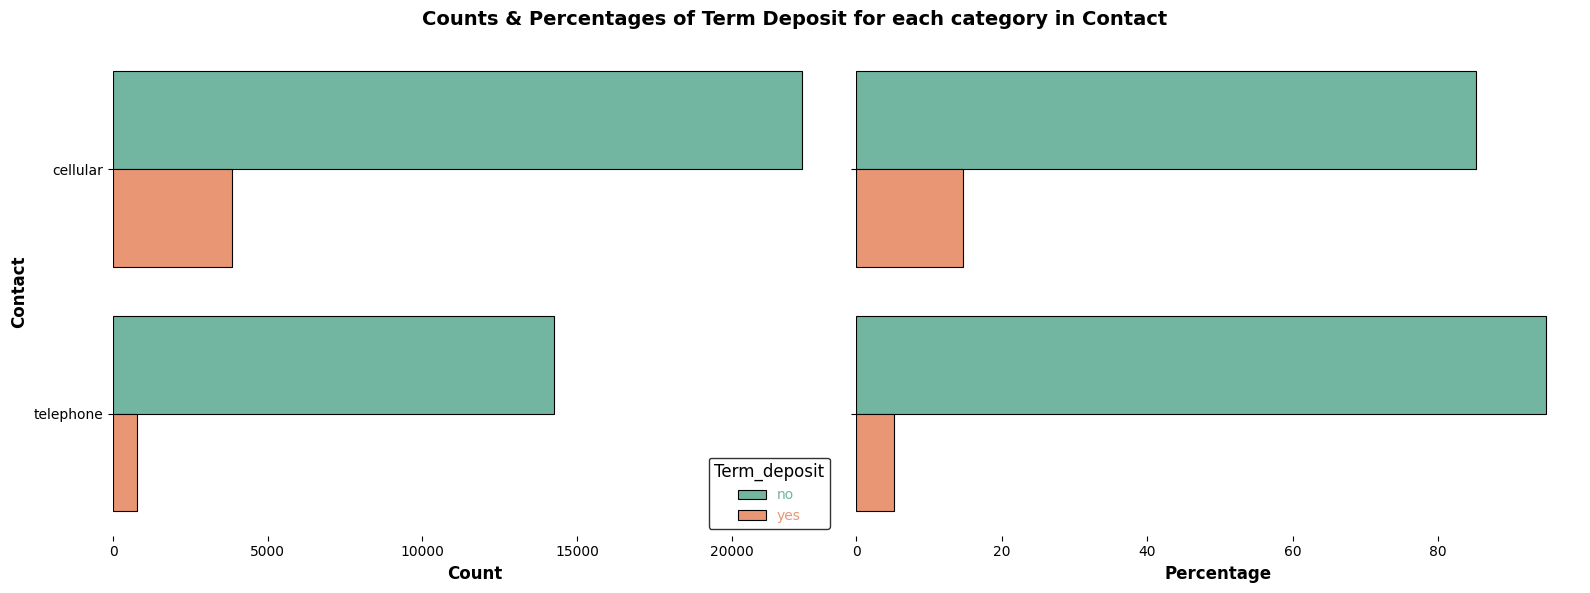

In [40]:
plot_categorical_columns(data, column='contact')

**Number of subscribers of term deposit by month and day of week**

**Conclusion:**
By the below analysis, we conclude that:

- Most number of customers who subscribed to term deposits in month of May and in all day of week except for thursday. 

- Least number of customers who subscribed to term deposits in month of December and in all day of week. Holidays and festive seasons are not effective in converting customers to term deposits.

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
day_of_week,,,,,,,,,,
fri,62,122,9,118,89,49,199,83,69,46
mon,77,107,23,120,136,57,191,67,42,27
thu,230,131,21,142,91,44,161,92,74,58
tue,81,148,15,133,125,84,149,90,67,61
wed,89,147,21,135,118,42,186,84,63,64


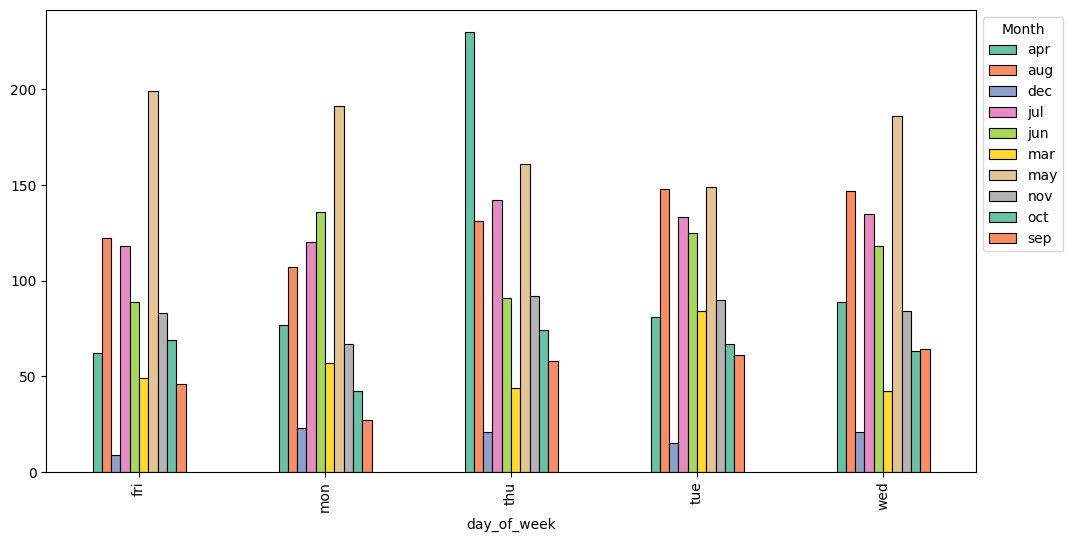

In [41]:
data1 = data[(data['term_deposit']=='yes')]
subsciber_df = pd.crosstab(data1['day_of_week'], data1['month'])
display(subsciber_df.style.highlight_max(axis='columns',color='yellow').highlight_min(axis='columns',color='coral'))


g = subsciber_df.plot(kind='bar',stacked=False,figsize=(12,6), color=sns.color_palette("Set2", n_colors=12), edgecolor='black', linewidth=0.8)
g.legend(title='Month',bbox_to_anchor=(1,1))
plt.show()

## Outliers Analysis & Treatment

In [42]:
# since duration = 0 doesn't have predictive power, we can drop it
new_df = data.query('duration > 0').reset_index(drop=True)
new_df.shape

(41172, 21)

In [43]:
# plot outliers for numeric columns
def inspect_outliers(df:pd.DataFrame):
    # store numeric columns 
    numeric_col = df.select_dtypes(include=['number']).columns
    # iterate through each numeric column
    for col in numeric_col:
        fig, ax = plt.subplots(ncols=2, figsize=(12,6))
        sns.boxplot(data=df, x = col, ax=ax[0], color='lightgreen')
        sns.histplot(data=df, x = col, ax=ax[1], kde=False, color='lightblue')
        plt.suptitle(f'Outliers Analysis for {col.capitalize()}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

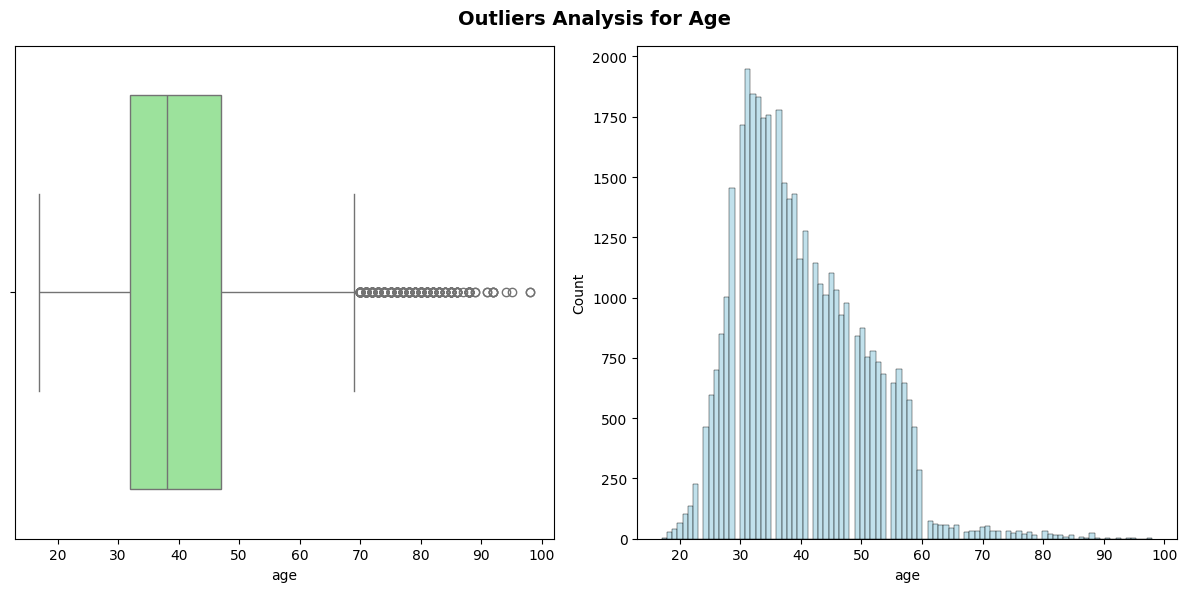

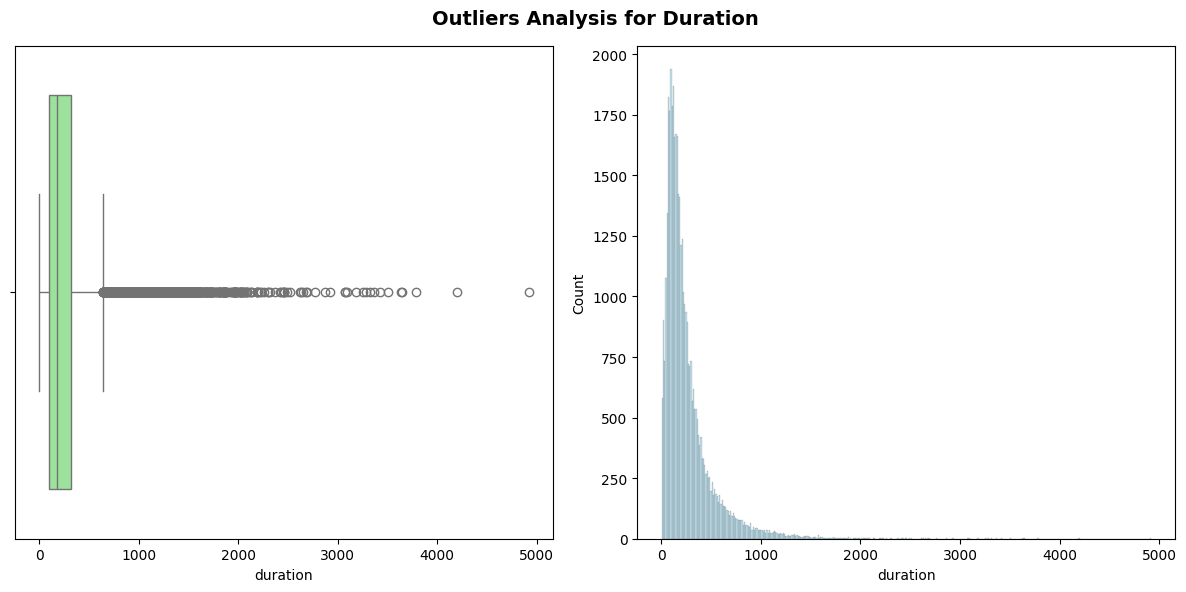

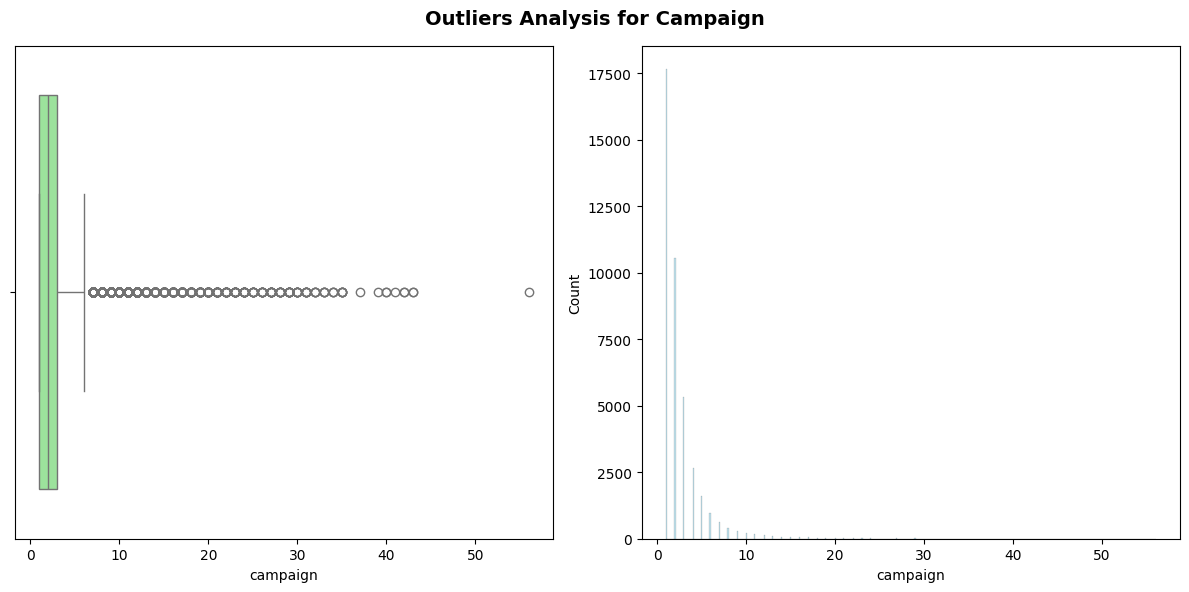

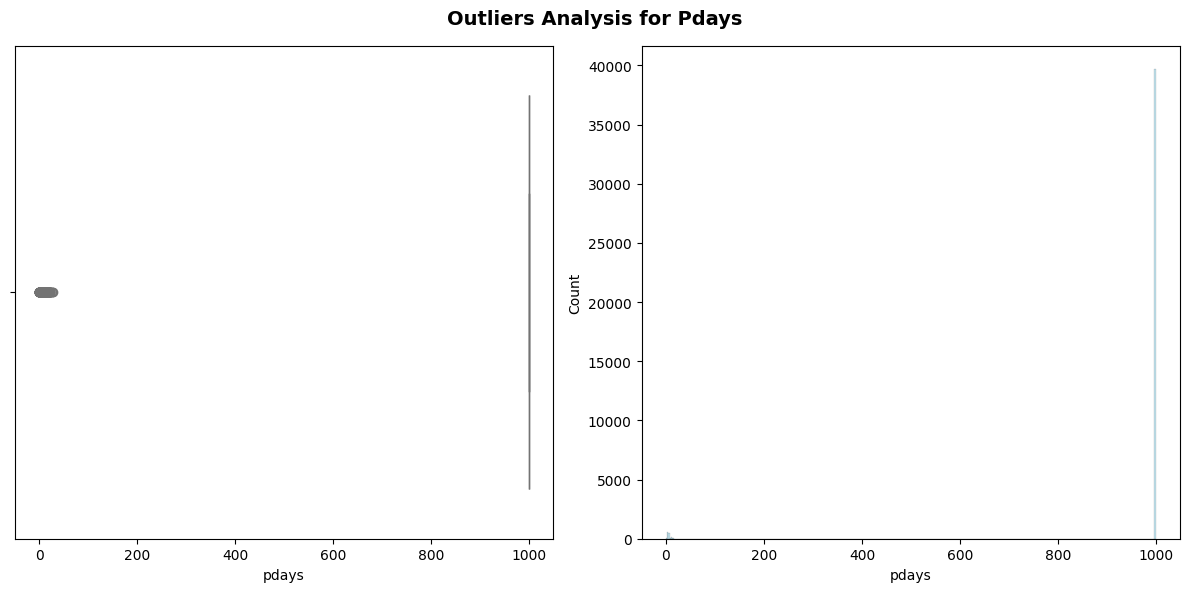

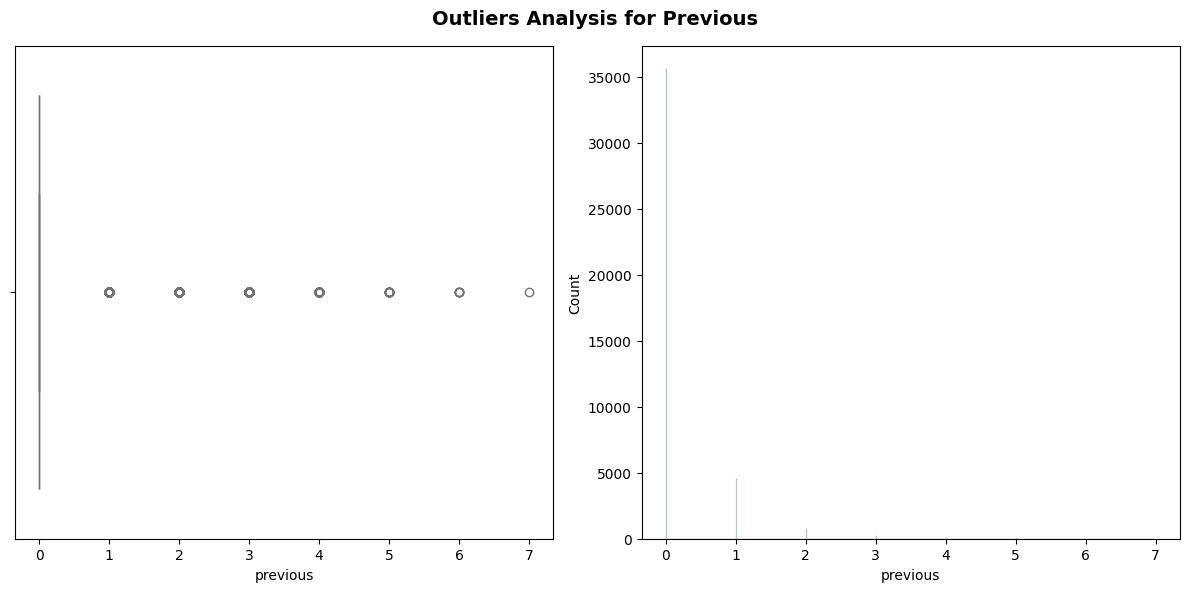

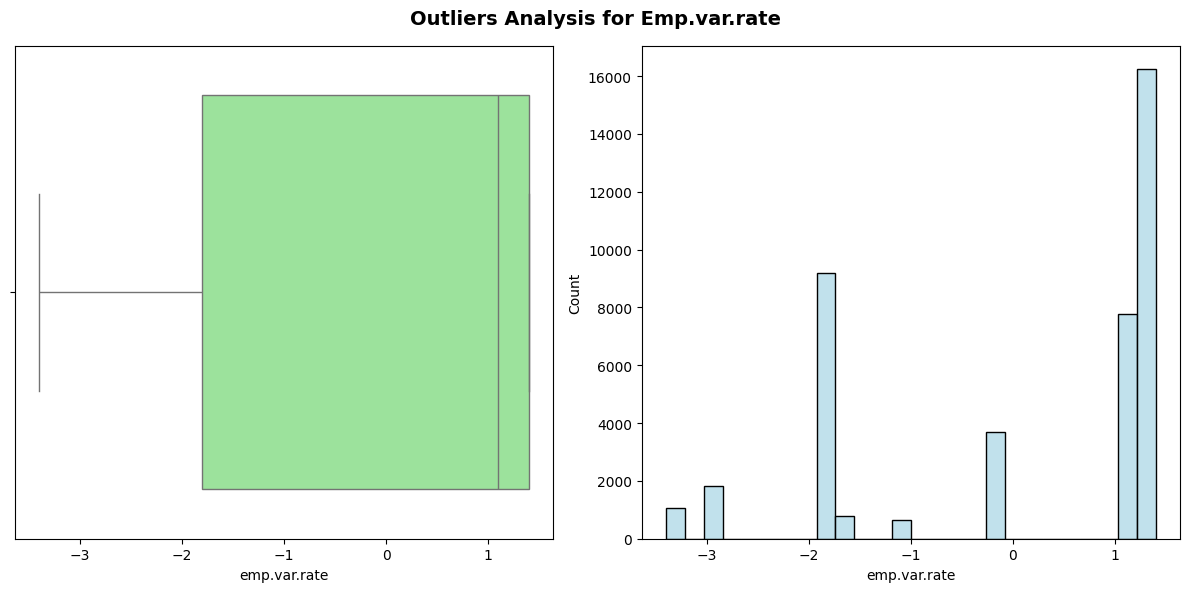

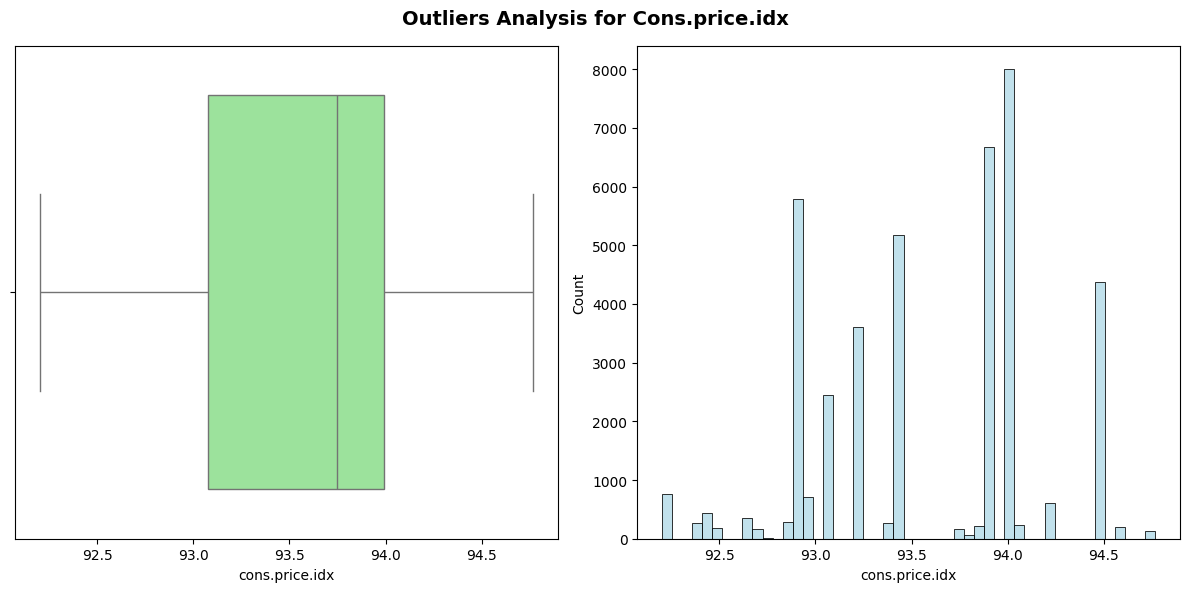

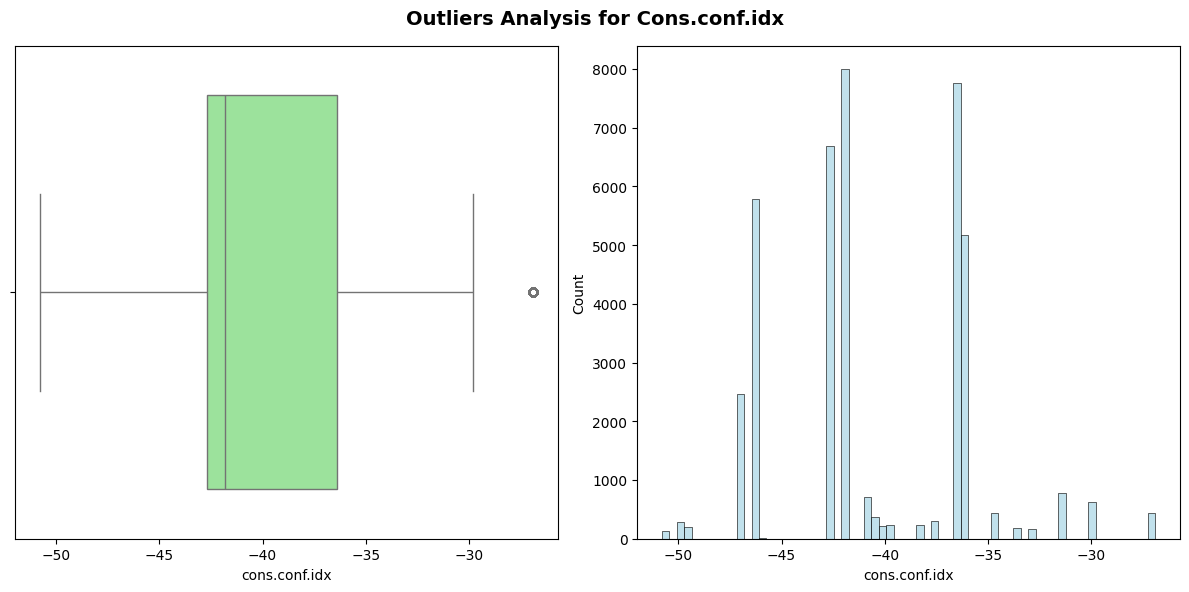

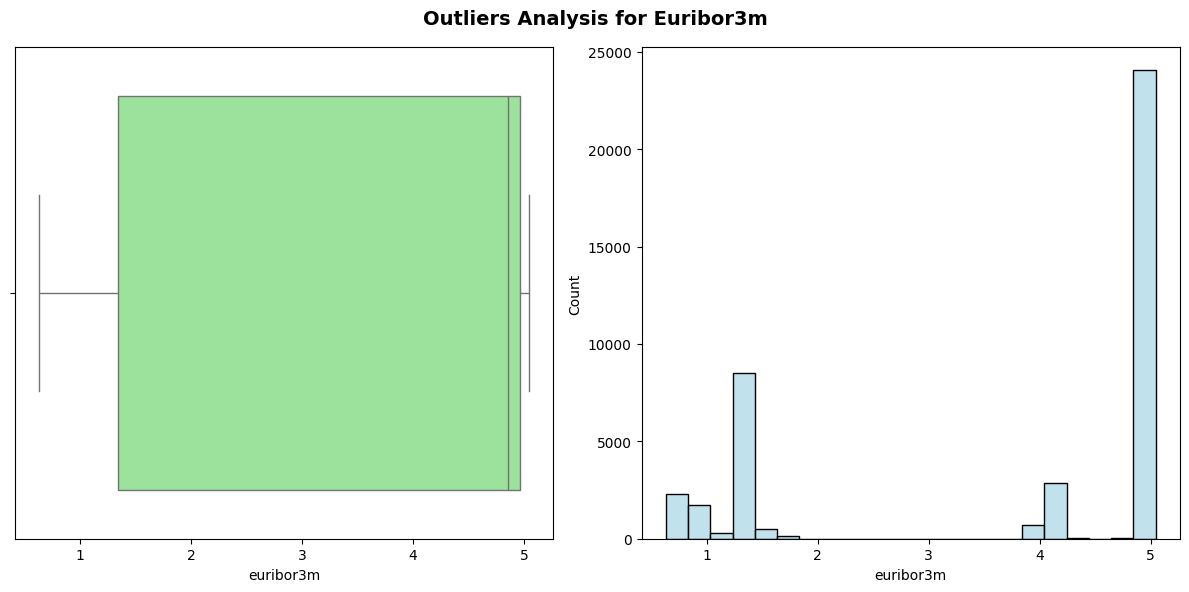

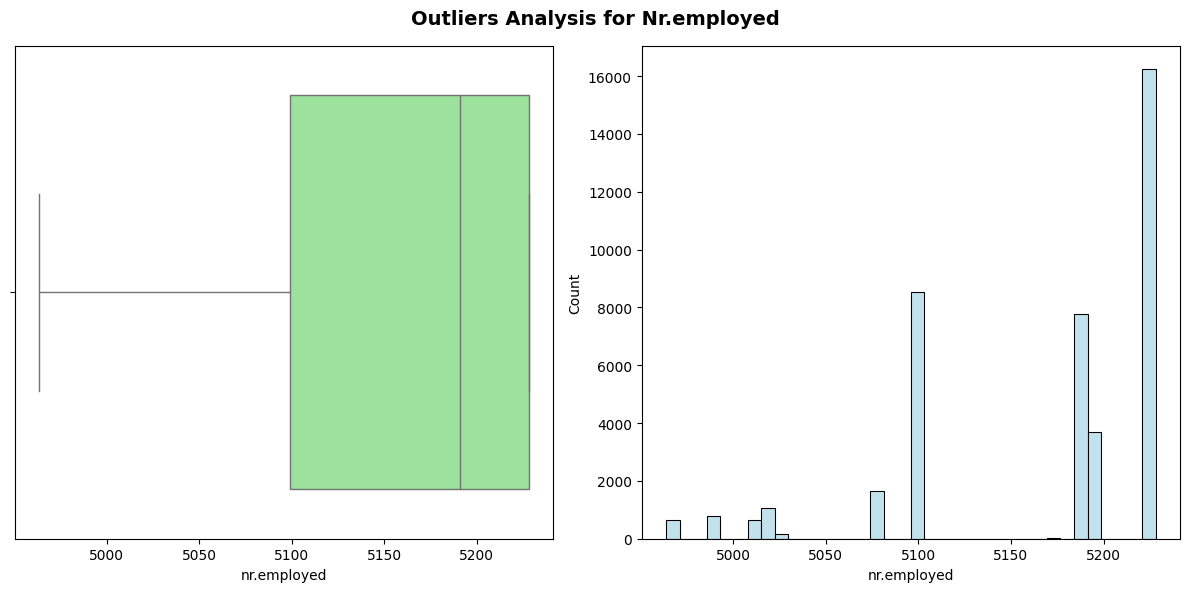

In [44]:
inspect_outliers(new_df)

In [45]:
# outliers percentage in each features
def calculate_outlier_percentage(df:pd.DataFrame, lower_percentile:float=5, upper_percentile: float=95) -> pd.DataFrame:
    """
    Calculate the percentage of outliers based on winsorized method for all the numeric columns in the DataFrame.

    Parameters:
    df(pd.DataFrame): The input DataFrame containing numerical features.
    lower_percentile(float): The lower percentile foe winsorization. Default is 5.
    upper_percentile(float): The upper percentile for winsorization. Default is 95.


    Returns:
    pd.DataFrame: A DataFrame contains features name along w.r.t their outlier percentage in it.
    """
    num_col = new_df.select_dtypes(include='number').columns
    variable = []
    outlier = []

    for col in num_col:
        x_low, x_high = np.percentile(new_df[col], [lower_percentile, upper_percentile])
        total = len(new_df[col])
        outliers_len = len(df[~df[col].between(x_low, x_high)])
        outlier_percentage = round((outliers_len/total)*100, 2)
        variable.append(col)
        outlier.append(outlier_percentage)

    outlier_df = pd.DataFrame(zip(variable, outlier), columns=['Features', 'Outliers Percentage'])
    return outlier_df

In [46]:
anamoly_df = calculate_outlier_percentage(new_df)
anamoly_df.sort_values(by=['Outliers Percentage'],ascending=False).reset_index(drop=True)

,Features,Outliers Percentage
0,duration,9.85
1,euribor3m,9.39
2,age,8.06
3,cons.conf.idx,6.38
4,cons.price.idx,5.71
5,nr.employed,5.00
6,campaign,4.31
7,pdays,3.68
8,emp.var.rate,3.02
9,previous,2.58


In [47]:
# Outlier Treatment using winsorization method 
def outlier_by_wisorize(df: pd.DataFrame, lower_percent:float=5, upper_percent:float=95, exclude_col:list=None)->pd.DataFrame:
    """
    A DataFrame with numeric columns in it.
    
    Parameters:
    df: the input DataFrame
    lower_percent: float value which by default take 5.
    upper_percent: float value which by default take 95.

    Return:
    A DataFrame without outliers.
    """
    df_winsorize = df.copy()
    num_col = df.select_dtypes(include='number').columns
    winsorize_col = set(num_col) - set(exclude_col) if exclude_col else num_col
    
    for col in winsorize_col:
        x_low, x_high = np.percentile(df[col],[lower_percent, upper_percent])
        df_winsorize[col] = np.where(df_winsorize[col] < x_low, x_low, df_winsorize[col]) # lower capping
        df_winsorize[col] = np.where(df_winsorize[col] > x_high, x_high, df_winsorize[col]) # upper capping

    return df_winsorize


In [48]:
winsorize_df = outlier_by_wisorize(new_df, exclude_col=['pdays'])

In [49]:
# check statistical difference or not of outlier capping on numeric columns
def plot_kde_before_after(df:pd.DataFrame, winsorize_df:pd.DataFrame, exclude_col:list):
    """
    Plot KDE for all numeric columns before and after winsorization and calculate wilcoxon rank-sum test results.

    Parameters:
    df: pd.DataFrame the original dataframe
    winsorize_df: winsorize method dataframe
    exclude_col: List of column to exclude from plotting
    """
    num_col = df.select_dtypes(include='number').columns
    plot_col = set(num_col) - set(exclude_col) if exclude_col else num_col

    #plot kdeplot
    for col in plot_col:
        fig, ax = plt.subplots(1,1, figsize=(8,4))
        sns.kdeplot(df[col], ax=ax, label='Original', fill=True)
        sns.kdeplot(winsorize_df[col], ax=ax, label='Original', fill=True)
        plt.title(f"KDE Plot for {col.capitalize()}", fontweight='bold')
        plt.xlabel(f"{col.capitalize()}", fontweight='bold')
        plt.ylabel('Density', fontweight='bold')
        plt.legend(labelcolor='linecolor')

        plt.tight_layout()
        plt.show()
        # Wilcoxon rank-sum test
        u_stats, p_value = stats.mannwhitneyu(df[col], winsorize_df[col])
        print(f"Wilcoxon rank-sum test for '{col}' : U Statistic: {u_stats:.4f}, P-Value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"The Distributions of '{col}' are statistically different (p_value < 0.05).")
        else:
            print(f"The Distributions of '{col}' are not statistically different (p_value > 0.05).")

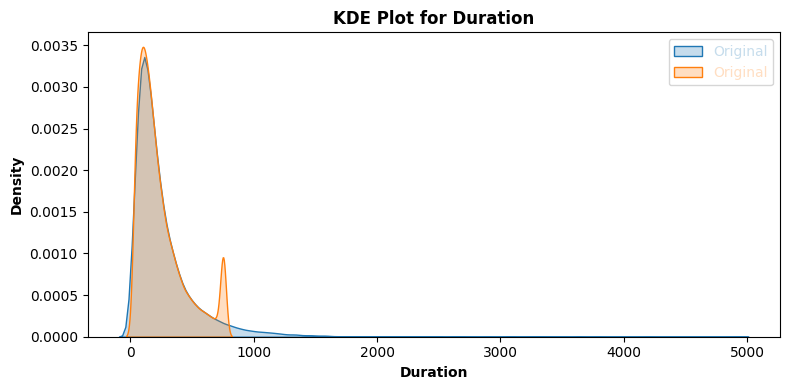

Wilcoxon rank-sum test for 'duration' : U Statistic: 847588134.5000, P-Value: 0.9950
The Distributions of 'duration' are not statistically different (p_value > 0.05).


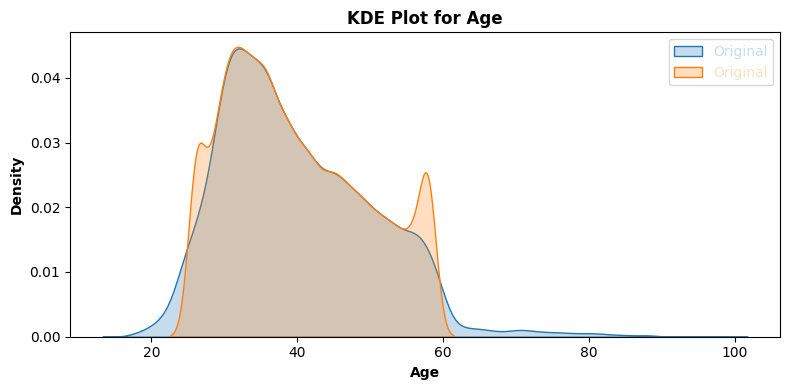

Wilcoxon rank-sum test for 'age' : U Statistic: 847443804.5000, P-Value: 0.9712
The Distributions of 'age' are not statistically different (p_value > 0.05).


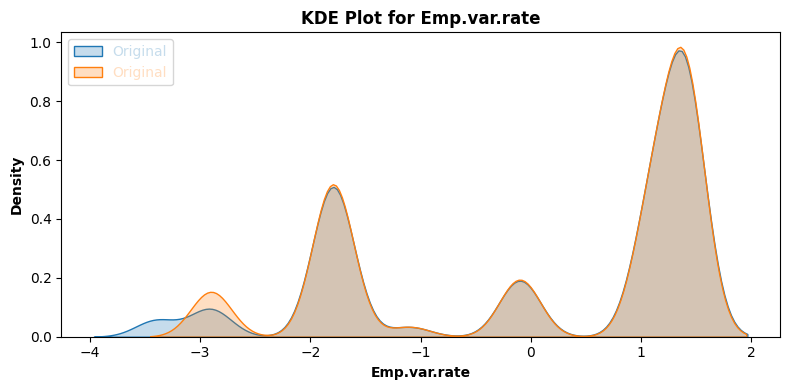

Wilcoxon rank-sum test for 'emp.var.rate' : U Statistic: 845763408.0000, P-Value: 0.5815
The Distributions of 'emp.var.rate' are not statistically different (p_value > 0.05).


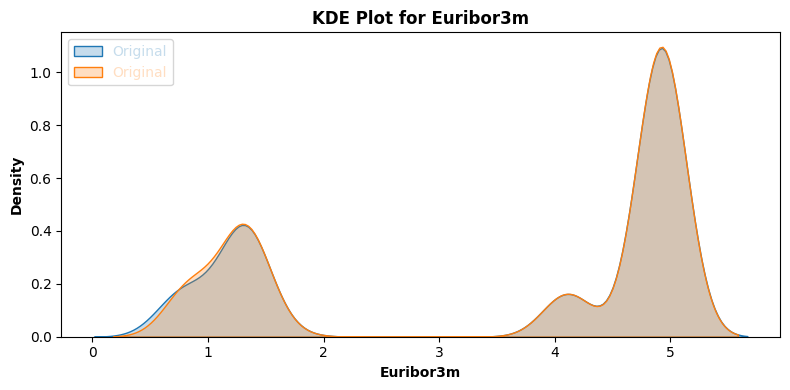

Wilcoxon rank-sum test for 'euribor3m' : U Statistic: 847659522.0000, P-Value: 0.9783
The Distributions of 'euribor3m' are not statistically different (p_value > 0.05).


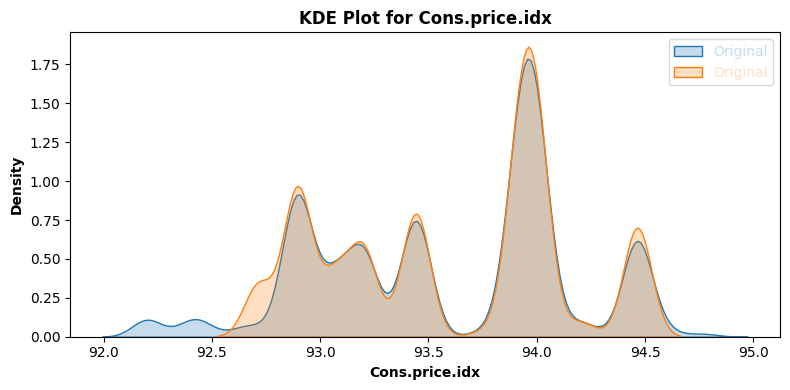

Wilcoxon rank-sum test for 'cons.price.idx' : U Statistic: 846140381.5000, P-Value: 0.6730
The Distributions of 'cons.price.idx' are not statistically different (p_value > 0.05).


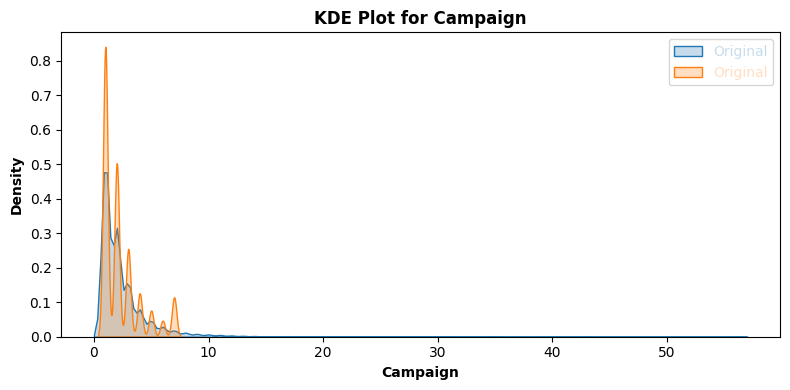

Wilcoxon rank-sum test for 'campaign' : U Statistic: 849702432.0000, P-Value: 0.5097
The Distributions of 'campaign' are not statistically different (p_value > 0.05).


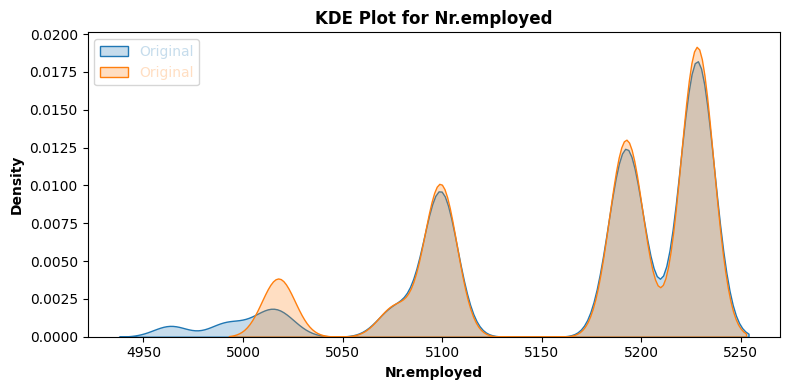

Wilcoxon rank-sum test for 'nr.employed' : U Statistic: 844348080.0000, P-Value: 0.3258
The Distributions of 'nr.employed' are not statistically different (p_value > 0.05).


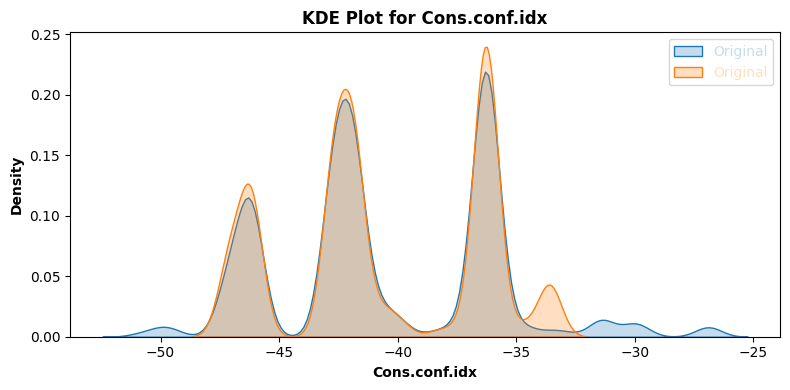

Wilcoxon rank-sum test for 'cons.conf.idx' : U Statistic: 848826436.0000, P-Value: 0.7094
The Distributions of 'cons.conf.idx' are not statistically different (p_value > 0.05).


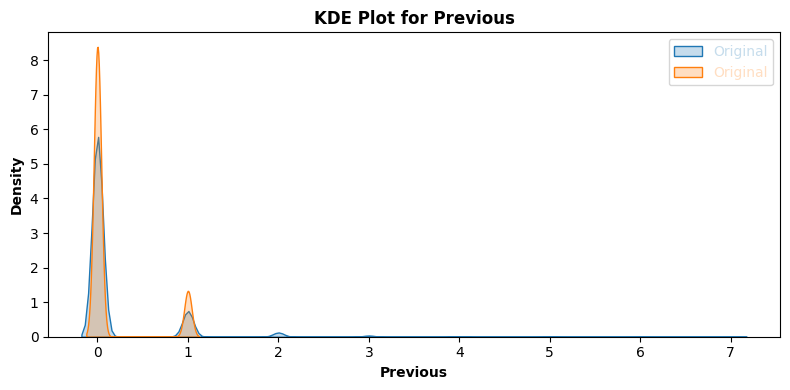

Wilcoxon rank-sum test for 'previous' : U Statistic: 850559292.0000, P-Value: 0.1406
The Distributions of 'previous' are not statistically different (p_value > 0.05).


In [50]:
plot_kde_before_after(new_df, winsorize_df, exclude_col=['pdays'])

# Feature Engineering

In [86]:
winsorize_df['age_group'] = pd.cut(winsorize_df['age'],bins=3, labels=['young','middle-age','senior'])
winsorize_df.head(1)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,term_deposit,age_group
0,56.00,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.00,1.00,999,0.00,nonexistent,-36.40,no,senior


# Feature Selection

**Numerical Features**

## Correlation Method

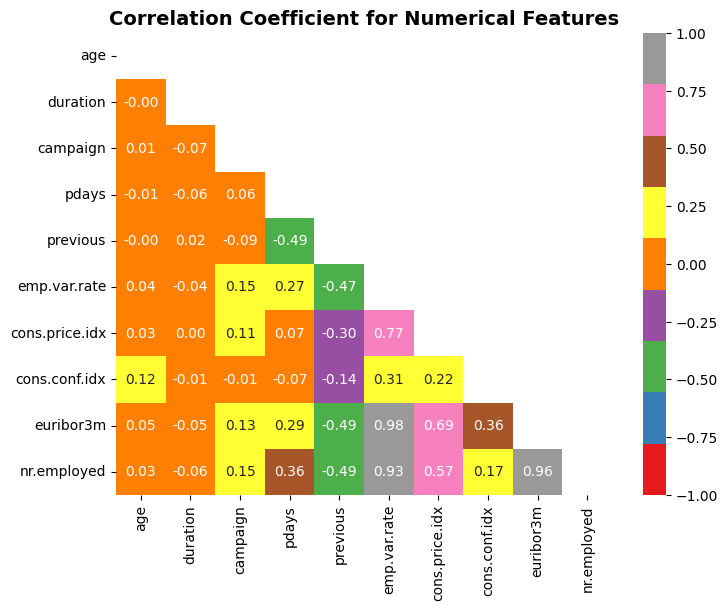

In [52]:
# Calculate correlation of numerical columns
corr_df = winsorize_df.select_dtypes(include='number').corr()

# Generate a mask for upper triangle
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, fmt='.2f', mask=mask, cmap=sns.color_palette('Set1'),vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Coefficient for Numerical Features',fontsize=14, fontweight='bold')
plt.show()

**pearson's r also known as Pearson Correlation Coefficient. It calculates linear relation between numerical features. Eliminating Features on this basis would only runs the risk of removing too much information, which is detrimental to your efforts for building a reliable model. Follow hybrid method for elimination of features, will use VIF.**

## VIF Method

In [53]:
# compute vif for numeric columns
def calculate_vif(df:pd.DataFrame):

    #select numeric columns
    num_df = df.select_dtypes(include='number')
    # the computation of vif required constant
    num_df['intercept'] = 1

    # create Dataframe to store features and vif values
    vif_df = pd.DataFrame()
    vif_df['Features'] = num_df.columns
    vif_df['VIF'] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]
    vif_df = vif_df[vif_df['Features'] != 'intercept']
    return(vif_df)

# Criterion: Remove variable with vif >= 5

In [54]:
vif = calculate_vif(winsorize_df)
vif['VIF'] = vif['VIF'].round(0)
vif

,Features,VIF
0,age,1.00
1,duration,1.00
2,campaign,1.00
3,pdays,1.00
4,previous,2.00
5,emp.var.rate,35.00
6,cons.price.idx,5.00
7,cons.conf.idx,3.00
8,euribor3m,68.00
9,nr.employed,40.00


In [55]:
vif[vif['VIF']>4]['Features'].to_list()

['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']

In [56]:
# Drop Multicollinear Features
winsorize_df.drop(columns=['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'],inplace=True)

### Skewness of Numeric Features

previous         2.12
campaign         1.45
duration         1.30
age              0.41
cons.conf.idx    0.01
pdays           -4.92
dtype: float64


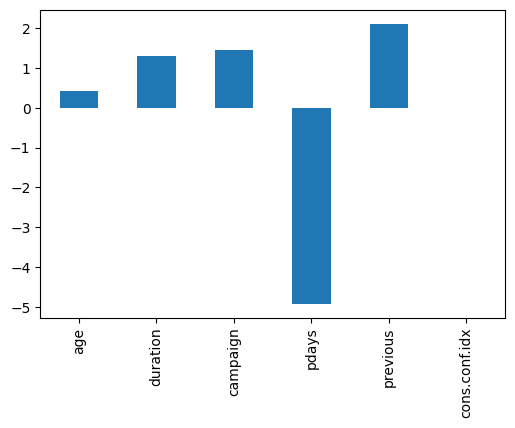

In [57]:
"""
Zero means normally distributed feature i.e., bell shaped curve.
Positive value means feature has rightly-skewed distribution.
Negative value means feature has left-skewed distribution.

"""
skewed = winsorize_df.select_dtypes(include='number').apply(lambda x: stats.skew(x))
print(skewed.sort_values(ascending=False))

# plot skewness of each features
ax=skewed.plot(kind='bar',figsize=(6,4))
plt.show()


**Categorical Features**

*****Categorical Features Modification*****

[]

## Cramer's V

**Cramer's V unlocks the strength and direction of associations between categorical features and returns a value between 0(weak) and 1(strong).**

In [99]:
def cramers_v(x,y):
    """ Calculate Cramers'V statistics for two categorical variables."""
    confusion_matrix = pd.crosstab(x,y) # compute contigency table
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix) # compute chi2 statistics
    n = confusion_matrix.sum().sum() # total number of observations
    min_dim = min(confusion_matrix.shape) - 1 # minimum dimension of confusion matix
    V = np.sqrt((chi2 / n) / min_dim) # calculate cramers'V statistics
    return V, chi2, p, dof



def filter_cat_features_association(df:pd.DataFrame):
    """
    Calculate cramers'V and chi-squared for each pair of categorical features.

    Parameters:
    df(pd.DataFrame): The input dataframe contains categorical features.

    Returns: 
    pd.DataFrame: A DataFrame contiaing pair of categorical features with their cramers'v values, chi-squared statistics, p_value, degree of freedom.
    """

    cat_col = df.select_dtypes(exclude='number').columns
    results = []

    for col1, col2 in combinations(cat_col, 2):
        V, chi2, p, dof = cramers_v(df[col1], df[col2])
        results.append({'Feature1': col1, 'Feature2': col2, 'Cramers_V': V, 'P_value': p, 'Degrees of Freedom': dof})

    results_df = pd.DataFrame(results)
    return results_df



In [109]:
pd.set_option('display.max_rows' ,None)
# Association between columns other than target_column: term_deposit
cramers_df = filter_cat_features_association(winsorize_df)
cramers_df[(cramers_df['Feature2'] != 'term_deposit') & (cramers_df['Feature1'] != 'term_deposit')].reset_index(drop=True)

,Feature1,Feature2,Cramers_V,P_value,Degrees of Freedom
0,job,marital,0.18,0.00,33
1,job,education,0.36,0.00,77
2,job,default,0.15,0.00,22
3,job,housing,0.02,0.09,22
4,job,loan,0.02,0.11,22
5,job,contact,0.13,0.00,11
6,job,month,0.11,0.00,99
7,job,day_of_week,0.02,0.00,44
8,job,poutcome,0.10,0.00,22
9,job,age_group,0.29,0.00,22


In [110]:
# Association between columns and target column: term_deposit
cramers_df[(cramers_df['Feature2'] == 'term_deposit') | (cramers_df['Feature1'] == 'term_deposit')].reset_index(drop=True)

,Feature1,Feature2,Cramers_V,P_value,Degrees of Freedom
0,job,term_deposit,0.15,0.00,11
1,marital,term_deposit,0.05,0.00,3
2,education,term_deposit,0.07,0.00,7
3,default,term_deposit,0.10,0.00,2
4,housing,term_deposit,0.01,0.06,2
5,loan,term_deposit,0.01,0.58,2
6,contact,term_deposit,0.14,0.00,1
7,month,term_deposit,0.27,0.00,9
8,day_of_week,term_deposit,0.03,0.00,4
9,poutcome,term_deposit,0.32,0.00,2


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'term_deposit', 'age_group'],
      dtype='object')